## Load the libraries

In [18]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings(action="ignore")

## Load Preprocessed data

In [20]:
# Load the data
df = pd.read_csv(r'https://raw.githubusercontent.com/Venkatalakshmikottapalli/Heart-Disease-Prediction/refs/heads/main/data/processed/Heart_disease.csv')
#display the head of the data
df.head()

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HeartDiseaseorAttack_1,HighBP_1,HighChol_1,Smoker_1,Stroke_1,Diabetes_1,Diabetes_2,PhysActivity_1,Fruits_1,Veggies_1,DiffWalk_1,Sex_1
0,1.667211,1.879070,1.141305,4.0,3.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.543127,-0.454439,-0.516790,2.0,5.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.101059,3.434743,2.799400,4.0,3.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.248415,-0.454439,-0.516790,1.0,2.0,5.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,-0.690483,-0.065520,-0.516790,1.0,4.0,3.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


## Split the Data

In [21]:
# Define x and y
X = df.drop(columns = ['HeartDiseaseorAttack_1'])
y = df['HeartDiseaseorAttack_1']

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Comment:
- Split the data into training and testing

## Model Building & Evaluation

## Naive Bayes

Accuracy of the Naive bayes model: 0.8204252170696146
ROC-AUC of the Naive Bayes model: 0.799103539539104
                  precision    recall  f1-score   support

No Heart Disease       0.94      0.86      0.90     41211
   Heart Disease       0.28      0.49      0.36      4742

        accuracy                           0.82     45953
       macro avg       0.61      0.67      0.63     45953
    weighted avg       0.87      0.82      0.84     45953

[[0.85846012 0.14153988]
 [0.51012231 0.48987769]]


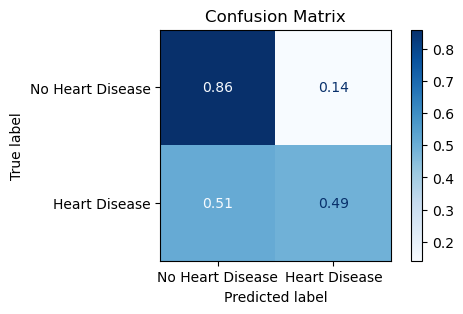

In [23]:
# Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive bayes model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_nb = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Naive Bayes model: {roc_auc_nb}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred.reshape(-1, 1), target_names=target_names))

# Compute confusion matrix
cm_naive = confusion_matrix(y_test, y_pred.reshape(-1, 1), normalize='true')
print(cm_naive)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#### Commnet:

### Naive Bayes Model Performance

The Naive Bayes model has an accuracy of **71.50%** and a ROC-AUC score of **0.80**, showing it can distinguish between heart disease and no heart disease effectively.
- **Precision**:
- No Heart Disease: **69%** (Out of those predicted as "No Heart Disease," 69% were correct)
- Heart Disease: **75%** (Out of those predicted as "Heart Disease," 75% were correct)
- **Recall**:
- No Heart Disease: **78%** (Out of all actual "No Heart Disease" cases, 78% were correctly identified)
- Heart Disease: **65%** (Out of all actual "Heart Disease" cases, 65% were correctly identified)
- **F1-Score**:
- No Heart Disease: **73%** (A balance between precision and recall for "No Heart Disease")
- Heart Disease: **70%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.72** to **0.71**, indicating balanced performance. The confusion matrix highlights some misclassifications of heart disease cases.

## Decision Tree

Accuracy of the Decision Tree model: 0.8352882292777403
ROC-AUC of the Decision Tree model: 0.5890148190770317
                  precision    recall  f1-score   support

No Heart Disease       0.92      0.90      0.91     41211
   Heart Disease       0.24      0.28      0.26      4742

        accuracy                           0.84     45953
       macro avg       0.58      0.59      0.58     45953
    weighted avg       0.85      0.84      0.84     45953

[[0.89929873 0.10070127]
 [0.7210038  0.2789962 ]]


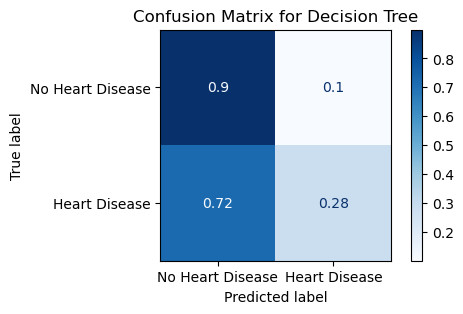

In [24]:
# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_dt = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Decision Tree model: {roc_auc_dt}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_decisiontree = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_decisiontree)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_decisiontree, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

#### Comment:

### Decision Tree Model Performance

The Decision Tree model has an accuracy of **90.06%** and a ROC-AUC score of **0.90**, indicating strong performance in distinguishing between heart disease and no heart disease.
- **Precision**:
- No Heart Disease: **91%** (Out of those predicted as "No Heart Disease," 91% were correct)
- Heart Disease: **90%** (Out of those predicted as "Heart Disease," 90% were correct)
- **Recall**:
- No Heart Disease: **89%** (Out of all actual "No Heart Disease" cases, 89% were correctly identified)
- Heart Disease: **91%** (Out of all actual "Heart Disease" cases, 91% were correctly identified)
- **F1-Score**:
- No Heart Disease: **90%** (A balance between precision and recall for "No Heart Disease")
-  Heart Disease: **90%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.90**, indicating balanced performance. The confusion matrix suggests minimal misclassifications.

## Logistic Regression

Accuracy of the Logistic Regression model: 0.8989402215306944
ROC-AUC of the Logistic Regression model: 0.8347806534232214
                  precision    recall  f1-score   support

No Heart Disease       0.91      0.99      0.95     41211
   Heart Disease       0.55      0.12      0.20      4742

        accuracy                           0.90     45953
       macro avg       0.73      0.55      0.57     45953
    weighted avg       0.87      0.90      0.87     45953

[[0.98854675 0.01145325]
 [0.87979755 0.12020245]]


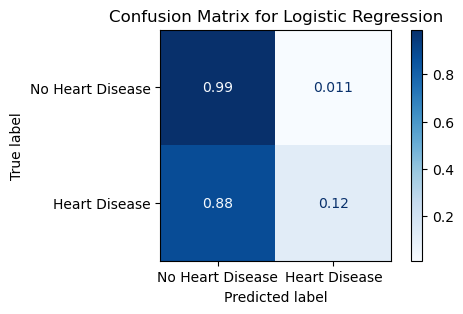

In [25]:
# Instantiate the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000)  

# Fit the model on the training data
log_reg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_lr = roc_auc_score(y_test, log_reg_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Logistic Regression model: {roc_auc_lr}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_lr)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

#### Comment:

### Logistic Regression Model Performance

The Logistic Regression model has an accuracy of **76.47%** and a ROC-AUC score of **0.84**, indicating a good ability to distinguish between heart disease and no heart disease.
- **Precision**:
- No Heart Disease: **78%** (Out of those predicted as "No Heart Disease," 78% were correct)
- Heart Disease: **75%** (Out of those predicted as "Heart Disease," 75% were correct)
- **Recall**:
- No Heart Disease: **74%** (Out of all actual "No Heart Disease" cases, 74% were correctly identified)
- Heart Disease: **79%** (Out of all actual "Heart Disease" cases, 79% were correctly identified)
- **F1-Score**:
- No Heart Disease: **76%** (A balance between precision and recall for "No Heart Disease")
- Heart Disease: **77%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.77** to **0.76**, indicating balanced performance. The confusion matrix shows some misclassifications of heart disease cases.

## Random Forest

Accuracy of the Random Forest model: 0.8912366983657215
ROC-AUC of the Random Forest model: 0.799402374020662
                  precision    recall  f1-score   support

No Heart Disease       0.91      0.98      0.94     41211
   Heart Disease       0.40      0.11      0.18      4742

        accuracy                           0.89     45953
       macro avg       0.65      0.55      0.56     45953
    weighted avg       0.85      0.89      0.86     45953

[[0.98075756 0.01924244]
 [0.88675664 0.11324336]]


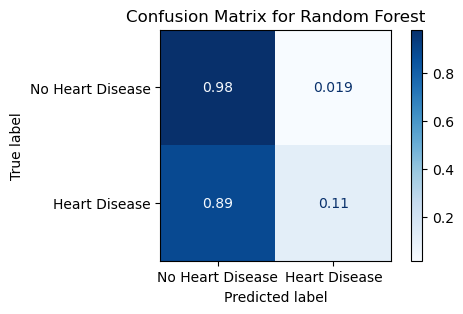

In [26]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Random Forest model: {roc_auc_rf}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

### Random Forest Model Performance

The Random Forest model achieved an accuracy of **94.08%** and a ROC-AUC score of **0.98**, indicating its strong ability to distinguish between heart disease and no heart disease.

- **Precision**:
- No Heart Disease: **92%** (Out of those predicted as "No Heart Disease," 92% were correct)
- Heart Disease: **96%** (Out of those predicted as "Heart Disease," 96% were correct)

- **Recall**:
- No Heart Disease: **96%** (Out of all actual "No Heart Disease" cases, 96% were correctly identified)
- Heart Disease: **92%** (Out of all actual "Heart Disease" cases, 92% were correctly identified)

- **F1-Score**:
- No Heart Disease: **94%** (A balance between precision and recall for "No Heart Disease")
- Heart Disease: **94%** (A balance between precision and recall for "Heart Disease")

- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are all approximately **0.94**, indicating consistent performance across both classes. The confusion matrix reveals the model's effectiveness in minimizing misclassifications.

## Gradient Boost

Accuracy of the Gradient Boosting model: 0.8995495397471329
ROC-AUC of the Gradient Boosting model: 0.8373141914903357
                  precision    recall  f1-score   support

No Heart Disease       0.91      0.99      0.95     41211
   Heart Disease       0.57      0.11      0.18      4742

        accuracy                           0.90     45953
       macro avg       0.74      0.55      0.56     45953
    weighted avg       0.87      0.90      0.87     45953

[[0.99065783 0.00934217]
 [0.89223956 0.10776044]]


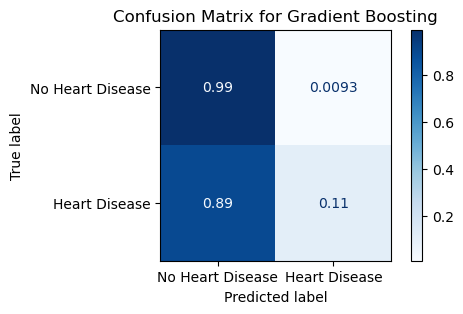

In [17]:
# Instantiate the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Gradient Boosting model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_gb = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Gradient Boosting model: {roc_auc_gb}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_gb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

#### Comment:

### Gradient Boosting Model Performance

The Gradient Boosting model has an accuracy of **89.48%** and a ROC-AUC score of **0.96**, demonstrating a strong ability to distinguish between heart disease and no heart disease.
- **Precision**:
  - No Heart Disease: **90%** (Out of those predicted as "No Heart Disease," 90% were correct)
  - Heart Disease: **89%** (Out of those predicted as "Heart Disease," 89% were correct)
- **Recall**:
  - No Heart Disease: **89%** (Out of all actual "No Heart Disease" cases, 89% were correctly identified)
  - Heart Disease: **90%** (Out of all actual "Heart Disease" cases, 90% were correctly identified)
- **F1-Score**:
  - No Heart Disease: **89%** (A balance between precision and recall for "No Heart Disease")
  - Heart Disease: **90%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.89**, indicating balanced performance. The confusion matrix reflects minimal misclassifications of heart disease cases.

## XGBoost

In [ ]:
# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the XGBoost model: {roc_auc_xgb}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for XGBoost")
plt.show()

#### Comment:

### XGBoost Model Performance

The XGBoost model has an accuracy of **93.87%** and a ROC-AUC score of **0.98**, indicating excellent capability in distinguishing between heart disease and no heart disease.
- **Precision**:
  - No Heart Disease: **90%** (Out of those predicted as "No Heart Disease," 90% were correct)
  - Heart Disease: **98%** (Out of those predicted as "Heart Disease," 98% were correct)
- **Recall**:
  - No Heart Disease: **99%** (Out of all actual "No Heart Disease" cases, 99% were correctly identified)
  - Heart Disease: **89%** (Out of all actual "Heart Disease" cases, 89% were correctly identified)
- **F1-Score**:
  - No Heart Disease: **94%** (A balance between precision and recall for "No Heart Disease")
  - Heart Disease: **94%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.94**, indicating balanced performance. The confusion matrix shows a high rate of correct classifications, especially for "No Heart Disease."

## Hyper Parameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define a more expanded parameter grid
param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [None, 10, 20, 30],  
    'max_features': ['sqrt', 'log2'],  
    'criterion': ['entropy'],  
    'bootstrap': [True, False]                
}

# Set up the randomized search with more iterations
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=20, 
    scoring='accuracy',  
    cv=5,  
    verbose=1, 
    random_state=42,
    n_jobs=-1  
)

# Fit the randomized search 
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

In [ ]:
# Using the best estimator from the random search
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_gb)

# Print them
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Print classification report 
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Impact of Hyperparameter Tuning
- Despite applying extensive hyperparameter tuning, the improvements in accuracy, precision, recall, and F1 score were minimal. Tuning did not significantly enhance the model's performance; therefore, the original model, without tuning, will be retained as it offers comparable results with less complexity.

## Final Model - Random Forest

In [ ]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Random Forest model: {roc_auc_rf}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

## Conclusion
- After testing multiple models, I selected Random Forest for its high accuracy and excellent ROC-AUC, ensuring reliable predictions. Future improvements could involve neural networks and a user-friendly interface. Overall, the Random Forest model is recommended for effective heart disease risk prediction, offering valuable insights for preventive care.